In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

In [4]:
data = fetch_california_housing()

In [9]:
cali_df = pd.DataFrame(data.data,columns=data.feature_names)

In [16]:
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
cali_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [19]:
from ipywidgets import interact

In [23]:
gas = pd.read_csv('./data/gas_consumption.csv',names=['tax', 'income', 'highway', 'drivers', 'gas'])
gas.head()

,tax,income,highway,drivers,gas
1,9.0,3571,1976,0.525,541
2,9.0,4092,1250,0.572,524
3,9.0,3865,1586,0.580,561
4,7.5,4870,2351,0.529,414
5,8.0,4399,431,0.544,410


Text(0, 0.5, 'gas')

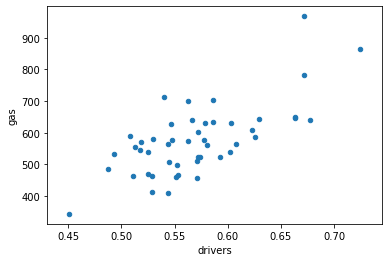

In [27]:
gas.plot(x='drivers',y='gas',kind='scatter')
plt.xlabel('drivers')
plt.ylabel('gas')

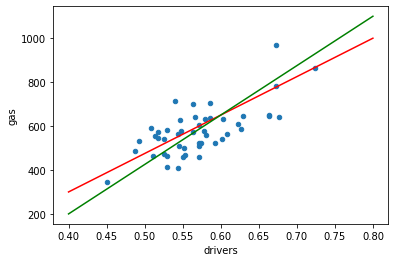

In [28]:
gas.plot(x='drivers',y='gas',kind='scatter')
plt.xlabel('drivers')
plt.ylabel('gas')
plt.plot([.4,.8],[300,1000],'r')
plt.plot([.4,.8],[200,1100],'g')

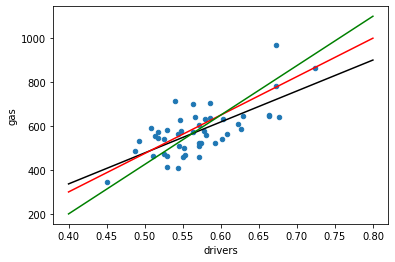

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(gas[['drivers']],gas['gas'])
gas.plot(x='drivers',y='gas',kind='scatter')
plt.xlabel=('drivers')
plt.ylabel=('gas')
x=np.linspace(.4,.8).reshape(-1,1)
plt.plot(x,model.predict(x),'k')
plt.plot([.4,.8],[300,1000],'r')
plt.plot([.4,.8],[200,1100],'g')

In [39]:
(model.intercept_,model.coef_[0])

(-227.3091174945256, 1409.8421113288002)

interactive(children=(Dropdown(description='column', options={'Gas tax': 'tax', '% of population driving': 'dr…

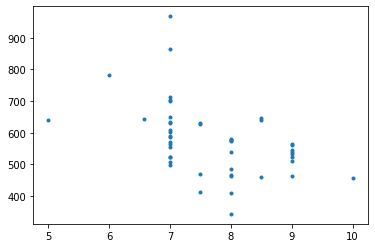

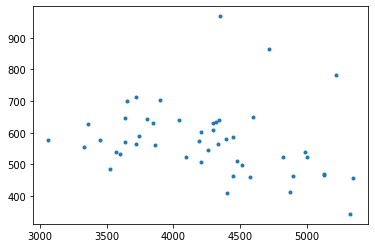

In [40]:
from ipywidgets import widgets

feature_desc = {'tax': 'Gas tax', 'drivers': '% of population driving', 'income': 'Average income (USD)', 'highway': 'Miles of paved highway'}
def plot_feature(column):
    plt.plot(gas[column], gas['gas'], '.')
    plt.xlabel(feature_desc[column])
    plt.ylabel('Gas consumption (millions gallons)')

dropdown_menu = {v: k for k, v in feature_desc.items()}

widgets.interact(plot_feature, column=dropdown_menu);